In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [5]:
from wordcloud import WordCloud

In [6]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user,
        postgres_pw, postgres_host, postgres_port, postgres_db))

In [7]:
df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

In [8]:
print(df.isnull().sum())
print(df.shape[0])
df.isnull().sum()/df.shape[0]

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64
1492


PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [9]:
fillcols = []
fulllist = df.columns

#Generate a list of the column names with nulls in a list called fillcol
for i in range(df.shape[1]):
    if df[fulllist[i]].isnull().sum() > 0:
            fillcols.append(fulllist[i])
print(fillcols)
#Fill null values with the mean from each respective column
states = df["STATE"].unique()

for state in states:
   df.loc[df["STATE"] == state, fillcols] = df.loc[df["STATE"] == state, fillcols].interpolate()


#Drop na for avg test score columns since they over 60% empty
df.dropna(inplace=True)


['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 54 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1046 non-null   object 
 1   STATE                         1046 non-null   object 
 2   YEAR                          1046 non-null   int64  
 3   ENROLL                        1046 non-null   float64
 4   TOTAL_REVENUE                 1046 non-null   float64
 5   FEDERAL_REVENUE               1046 non-null   float64
 6   STATE_REVENUE                 1046 non-null   float64
 7   LOCAL_REVENUE                 1046 non-null   float64
 8   TOTAL_EXPENDITURE             1046 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1046 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1046 non-null   float64
 11  OTHER_EXPENDITURE             1046 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1046 non-null   float64
 13  GR

In [11]:
#Check there are no nulls
df.isnull().sum()/df.shape[0]

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

# Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [13]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1046.000000,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,...,1046.000000,1046.000000,1046.000000,1.046000e+03,1.046000e+03,1.046000e+03,1046.000000,1046.000000,1046.000000,1046.000000
mean,2006.970363,9.312498e+05,1.016897e+07,8.849582e+05,4.715139e+06,4.568873e+06,1.025869e+07,5.302625e+06,2.997572e+06,4.659259e+05,...,71534.228967,71677.377629,62567.048279,5.751591e+05,2.797579e+05,8.764167e+05,235.269162,278.747113,219.099817,263.615681
std,6.242782,1.104296e+06,1.288751e+07,1.261405e+06,6.105385e+06,5.989616e+06,1.308992e+07,6.879720e+06,3.665806e+06,5.757227e+05,...,85272.286001,84302.592122,74919.819069,6.824060e+05,3.325605e+05,1.040403e+06,9.632646,9.912572,7.804302,5.768169
min,1993.000000,4.386600e+04,6.559710e+05,4.062200e+04,0.000000e+00,2.853100e+04,6.578090e+05,2.834840e+05,1.695450e+05,2.263600e+04,...,2548.000000,1485.000000,484.000000,1.922600e+04,2.758000e+03,2.455400e+04,187.134670,232.831510,179.324956,236.379102
25%,2002.000000,2.743105e+05,2.571806e+06,2.323988e+05,1.384262e+06,9.253550e+05,2.537691e+06,1.347766e+06,7.685512e+05,1.147892e+05,...,20166.750000,20564.750000,18304.000000,1.649732e+05,8.084075e+04,2.573745e+05,230.660761,273.383577,214.943439,259.956991
50%,2007.000000,6.638440e+05,5.842360e+06,4.945290e+05,2.906463e+06,2.335014e+06,5.959529e+06,2.999999e+06,1.776351e+06,3.029990e+05,...,50695.000000,49774.000000,40743.000000,4.052340e+05,1.859055e+05,6.232765e+05,237.041971,280.862695,220.962973,264.517851
75%,2012.000000,1.008680e+06,1.170678e+07,9.548370e+05,5.892033e+06,5.193129e+06,1.150621e+07,5.971732e+06,3.520381e+06,5.473685e+05,...,78924.000000,80671.250000,72551.000000,6.372388e+05,3.166840e+05,9.682915e+05,241.940254,285.257700,224.164324,267.663197
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


# Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 54 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1046 non-null   object 
 1   STATE                         1046 non-null   object 
 2   YEAR                          1046 non-null   int64  
 3   ENROLL                        1046 non-null   float64
 4   TOTAL_REVENUE                 1046 non-null   float64
 5   FEDERAL_REVENUE               1046 non-null   float64
 6   STATE_REVENUE                 1046 non-null   float64
 7   LOCAL_REVENUE                 1046 non-null   float64
 8   TOTAL_EXPENDITURE             1046 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1046 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1046 non-null   float64
 11  OTHER_EXPENDITURE             1046 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1046 non-null   float64
 13  GR

<function matplotlib.pyplot.legend(*args, **kwargs)>

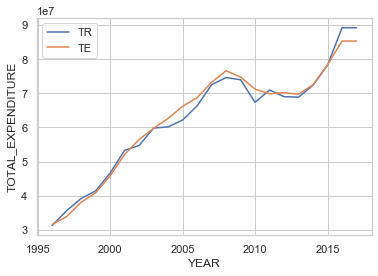

In [15]:
plotdata = df.loc[df['STATE']=='CALIFORNIA']
sns.lineplot(x='YEAR', y='TOTAL_REVENUE', data = plotdata, label ='TR')
sns.lineplot(x='YEAR', y='TOTAL_EXPENDITURE', data = plotdata, label = 'TE')
plt.legend

The housing crisis seems to correlate with the sudden decrease in revenue and expenditure

# In your chosen state, which of the lessons are the students more successful, math or reading?

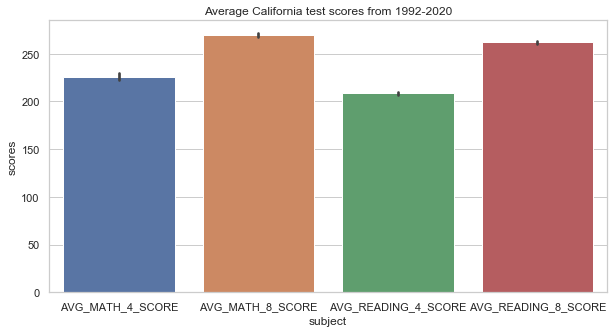

In [24]:
#'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', data =

dfmelt = pd.melt(df, id_vars=['STATE'], value_vars=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], var_name='subject', value_name='scores')
plt.figure(figsize=(10, 5))
plt.title('Average California test scores from 1992-2020')
sns.barplot(x= 'subject', y= 'scores', data = dfmelt.loc[dfmelt['STATE']=='CALIFORNIA'])


Math scores seem to be better on average 

# What are the distributions of the math and reading scores in the sample?

AVG_MATH_4_SCORE


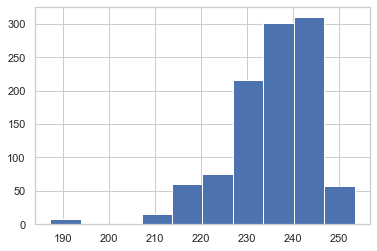

AVG_MATH_8_SCORE


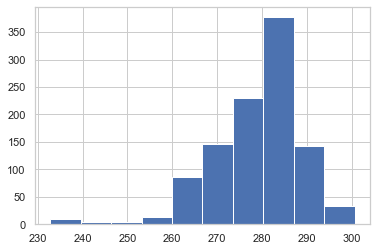

AVG_READING_4_SCORE


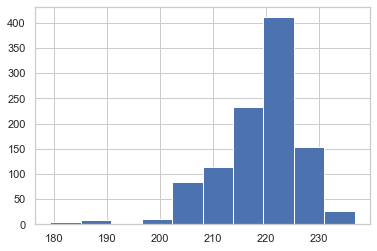

AVG_READING_8_SCORE


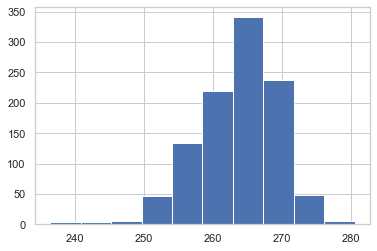

In [27]:
columns = df.columns[21:25]
columns

for x in columns:
  plt.hist(df[x])
  print(x)
  plt.show()


# Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. (You'll need to load the dataset once again to answer this question since we already filled in the missing values and then dropped the rows that have missing values.)

In [28]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user,
        postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

AVG_MATH_4_SCORE


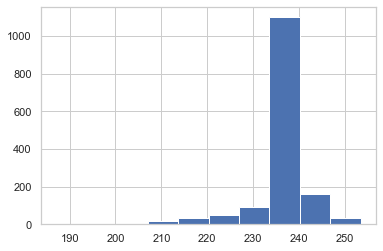

AVG_MATH_8_SCORE


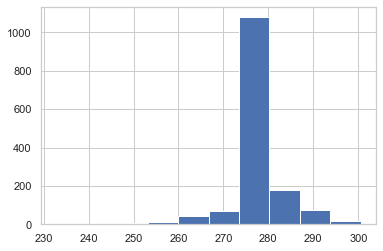

AVG_READING_4_SCORE


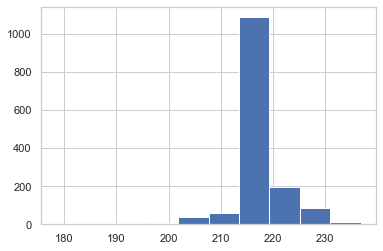

AVG_READING_8_SCORE


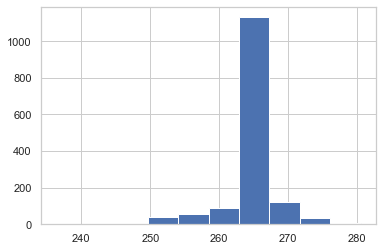

In [29]:
#Filling with mean
dfmean = df.fillna(df.mean())
columns = dfmean.columns[21:25]
columns

for x in columns:
  plt.hist(dfmean[x])
  print(x)
  plt.show()


AVG_MATH_4_SCORE


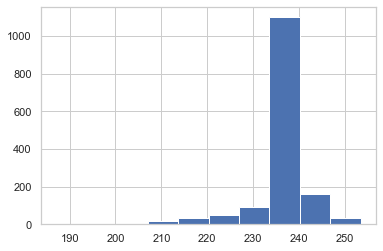

AVG_MATH_8_SCORE


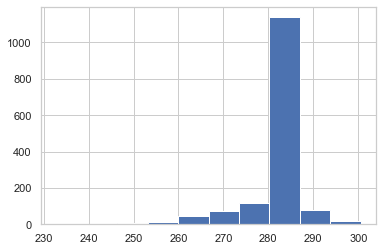

AVG_READING_4_SCORE


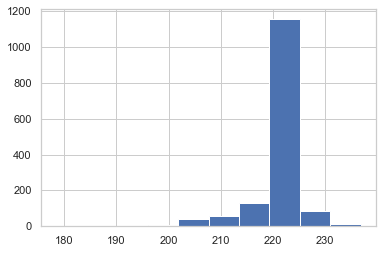

AVG_READING_8_SCORE


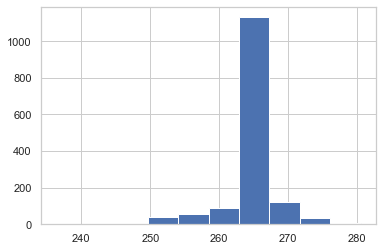

In [30]:
#Filling with median
#Filling with mean
dfmedian = df.fillna(df.median())
columns = dfmedian.columns[21:25]
columns

for x in columns:
  plt.hist(dfmedian[x])
  print(x)
  plt.show()


AVG_MATH_4_SCORE


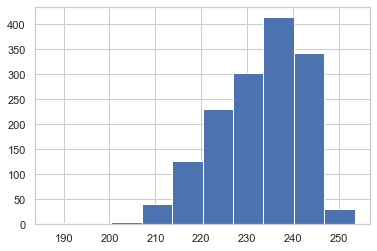

AVG_MATH_8_SCORE


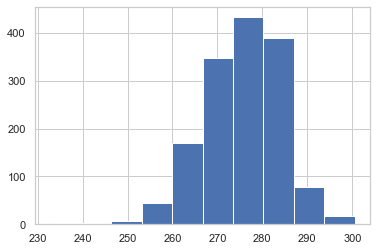

AVG_READING_4_SCORE


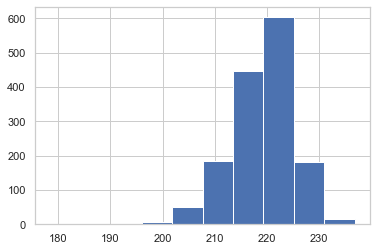

AVG_READING_8_SCORE


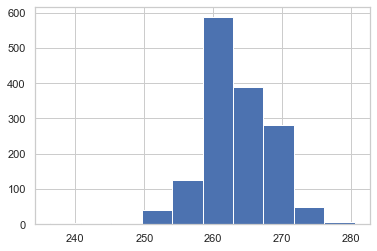

In [31]:
#Filling with interpolation
dfinterp = df.fillna(df.interpolate())
columns = dfinterp.columns[21:25]
columns

for x in columns:
  plt.hist(dfinterp[x])
  print(x)
  plt.show()